In [54]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from keras.models import Model, load_model, Sequential
from keras.layers import Input, Dense
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve

In [55]:
# df = pd.read_csv("creditcard.csv")
df = pd.read_csv("creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7968,10980,1.284388,-0.013181,0.646174,0.198985,-0.568675,-0.526121,-0.448235,-0.167709,1.773223,...,-0.101868,-0.030298,-0.081412,-0.123281,0.278808,1.064001,-0.090181,0.000481,15.95,0.0
7969,10981,1.190428,-0.122329,0.954945,0.267101,-0.971026,-0.652279,-0.612992,-0.003909,1.633117,...,-0.015001,0.127027,0.012079,0.534409,0.112179,1.004483,-0.100188,-0.004774,14.95,0.0
7970,10981,-0.725175,0.298202,1.824761,-2.587170,0.283605,-0.016617,0.153659,0.045084,-0.197611,...,-0.017097,-0.070535,-0.442861,-0.895837,0.624743,-0.510601,-0.031142,0.025564,12.95,0.0
7971,10981,1.226153,-0.129645,0.735197,0.142752,-0.703245,-0.349641,-0.612641,0.020507,1.648986,...,-0.047936,0.040196,-0.057391,-0.012386,0.187685,1.037786,-0.100081,-0.009869,15.95,0.0


In [56]:
df = df.drop(["Time"], axis = 1)

In [57]:
## Balanceamento dos dados
print(pd.crosstab(df["Class"], columns = "count"))

col_0  count
Class       
0.0     7947
1.0       25


In [58]:
#Normalização
df["Amount"] = StandardScaler().fit_transform(df["Amount"].values.reshape(-1, 1))

In [59]:
## separando os dados de treino e teste
x_train, x_test = train_test_split(df, test_size = 0.2)

x_train = x_train[x_train.Class == 0]
x_train = x_train.drop(["Class"], axis = 1)
y_test = x_test["Class"]
x_test = x_test.drop(["Class"], axis = 1)

x_train = x_train.values
test = x_test.values


In [60]:
input_dim = x_train.shape[1]
darbogaz = 10

model = Sequential()
model.add(Dense(30, input_dim = input_dim, activation = "tanh"))
model.add(Dense(15,activation = "relu"))
model.add(Dense(darbogaz,  activation = "tanh"))
model.add(Dense(15, activation = "relu"))
model.add(Dense(input_dim, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "mean_squared_error", metrics = ["accuracy"])

In [61]:
history = model.fit(x_train, x_train, epochs = 10, batch_size = 32,shuffle = True, verbose = 2, validation_data = (x_test, x_test)).history

Epoch 1/10
199/199 - 2s - loss: 1.1151 - accuracy: 0.1850 - val_loss: 0.9964 - val_accuracy: 0.1806 - 2s/epoch - 8ms/step
Epoch 2/10
199/199 - 0s - loss: 0.9578 - accuracy: 0.2517 - val_loss: 0.9289 - val_accuracy: 0.2520 - 432ms/epoch - 2ms/step
Epoch 3/10
199/199 - 1s - loss: 0.9076 - accuracy: 0.3117 - val_loss: 0.8956 - val_accuracy: 0.3354 - 506ms/epoch - 3ms/step
Epoch 4/10
199/199 - 0s - loss: 0.8810 - accuracy: 0.3331 - val_loss: 0.8750 - val_accuracy: 0.3592 - 498ms/epoch - 3ms/step
Epoch 5/10
199/199 - 0s - loss: 0.8635 - accuracy: 0.3631 - val_loss: 0.8626 - val_accuracy: 0.3505 - 424ms/epoch - 2ms/step
Epoch 6/10
199/199 - 0s - loss: 0.8526 - accuracy: 0.3667 - val_loss: 0.8538 - val_accuracy: 0.3348 - 430ms/epoch - 2ms/step
Epoch 7/10
199/199 - 1s - loss: 0.8444 - accuracy: 0.3667 - val_loss: 0.8467 - val_accuracy: 0.3586 - 516ms/epoch - 3ms/step
Epoch 8/10
199/199 - 1s - loss: 0.8380 - accuracy: 0.3749 - val_loss: 0.8409 - val_accuracy: 0.3624 - 636ms/epoch - 3ms/step
Epo

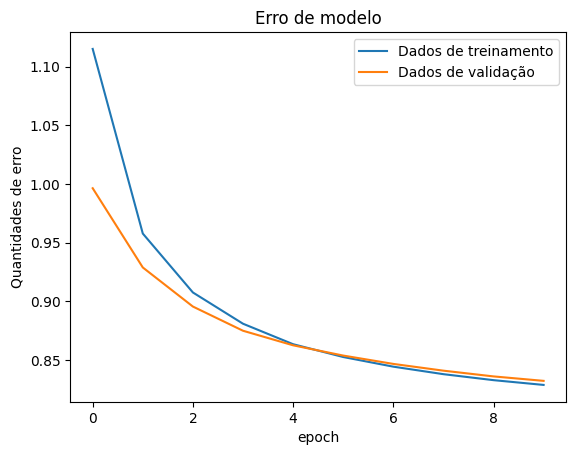

In [62]:
plt.plot(history["loss"])
plt.plot(history["val_loss"])
plt.title("Erro de modelo")
plt.ylabel("Quantidades de erro")
plt.xlabel("epoch")

plt.legend(["Dados de treinamento", "Dados de validação"], loc = "upper right")
plt.show()